# Phân loại ảnh với bộ dataset Cifar10

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2025-06-07 08:54:20.316915: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-07 08:54:20.415783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749261260.454728   11786 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749261260.466344   11786 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749261260.550279   11786 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Tải và xử lý dữ liệu

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 862s 5us/step


## Xem các thông tin về dữ liệu và vẽ biểu đồ

In [3]:
print("Training data X shape:{}".format(X_train.shape))
print("Training data y.shape:{}".format(y_train.shape))
print("-"*50)
print("Testing data X.shape:{}".format(X_test.shape))
print("Testing data y.shape:{}".format(y_test.shape))

Training data X shape:(50000, 32, 32, 3)
Training data y.shape:(50000, 1)
--------------------------------------------------
Testing data X.shape:(10000, 32, 32, 3)
Testing data y.shape:(10000, 1)


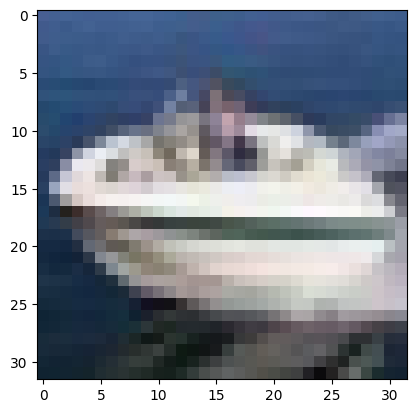

In [4]:
#Hiển thị ảnh
i_img = 222
a_single_image = X_train[i_img,:,:,:]
plt.imshow(a_single_image)
plt.show()

In [5]:
print("MIN:{}".format(a_single_image.min()))
print("MAX:{}".format(a_single_image.max()))

MIN:10
MAX:254


In [6]:
#Scaling
X_train = X_train/255
X_test = X_test/255

In [7]:
batch_size = 8
n_epochs = 20
learn_rate = 0.0001

## Định nghĩa mô hình

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
# Mạng tích chập thứ nhất
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7),strides=(1,1),padding='same',data_format='channels_last',name='conv_1st',activation=None))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name="pool_1st"))

I0000 00:00:1749262218.581317   11786 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2270 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [9]:
# Mạng tích chập thứ 2
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5),strides=(1,1,),padding='same',name='conv_2st',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name='pool_2'))

In [10]:

# Lớp Flattern
model.add(tf.keras.layers.Flatten())
# Thêm lớp full conneted
model.add(tf.keras.layers.Dense(units=1024,activation='relu',name="fc_1"))
#Dropout
model.add(tf.keras.layers.Dropout(rate=0.5))



In [ ]:
# Lớp đầu ra gồm 10 classes
model.add(tf.keras.layers.Dense(units=10,activation='softmax',name='output'))

## Định nghĩa loss function và optimizer

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1st (Conv2D)               │ (None, 32, 32, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1st (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2st (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,261,578 (16.26 MB)

 Trainable params: 4,261,578 (16.26 MB)

 Non-trainable params: 0 (0.00 B)

## Huấn luyện

In [ ]:
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=n_epochs,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.3843 - loss: 1.7030 - val_accuracy: 0.5882 - val_loss: 1.1730
Epoch 2/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.5839 - loss: 1.1805 - val_accuracy: 0.6437 - val_loss: 1.0368
Epoch 3/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.6473 - loss: 1.0074 - val_accuracy: 0.6521 - val_loss: 0.9860
Epoch 4/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.6904 - loss: 0.8903 - val_accuracy: 0.6736 - val_loss: 0.9444
Epoch 5/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.7282 - loss: 0.7906 - val_accuracy: 0.6964 - val_loss: 0.8713
Epoch 6/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7539 - loss: 0.7069 - val_accuracy: 0.7217 - val_loss: 0.8127
Epoch 7/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7815 - loss: 0.6298 - val_accuracy: 0.7227 - val_loss: 0.8077
Epoch 8/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8080 - loss: 0

## Vẽ biểu đồ huấn luyện

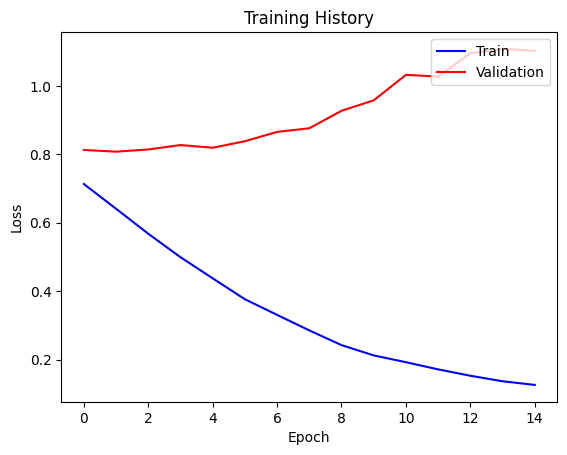

In [ ]:
n_skip=5 # bỏ qua các epoch đầu khi mô hình chưa ổn định
plt.plot(history.history['loss'][n_skip:],c="b")
plt.plot(history.history['val_loss'][n_skip:],c="r")
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

## Dự đoán

In [ ]:
y_pred = model.predict(X_test[1:,:,:,:])
y_pred = np.argmax(y_pred,axis=1)
img = X_test[1,:,:,:]
plt.imshow(X_test[1,:,:,:])
print(y_pred[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0


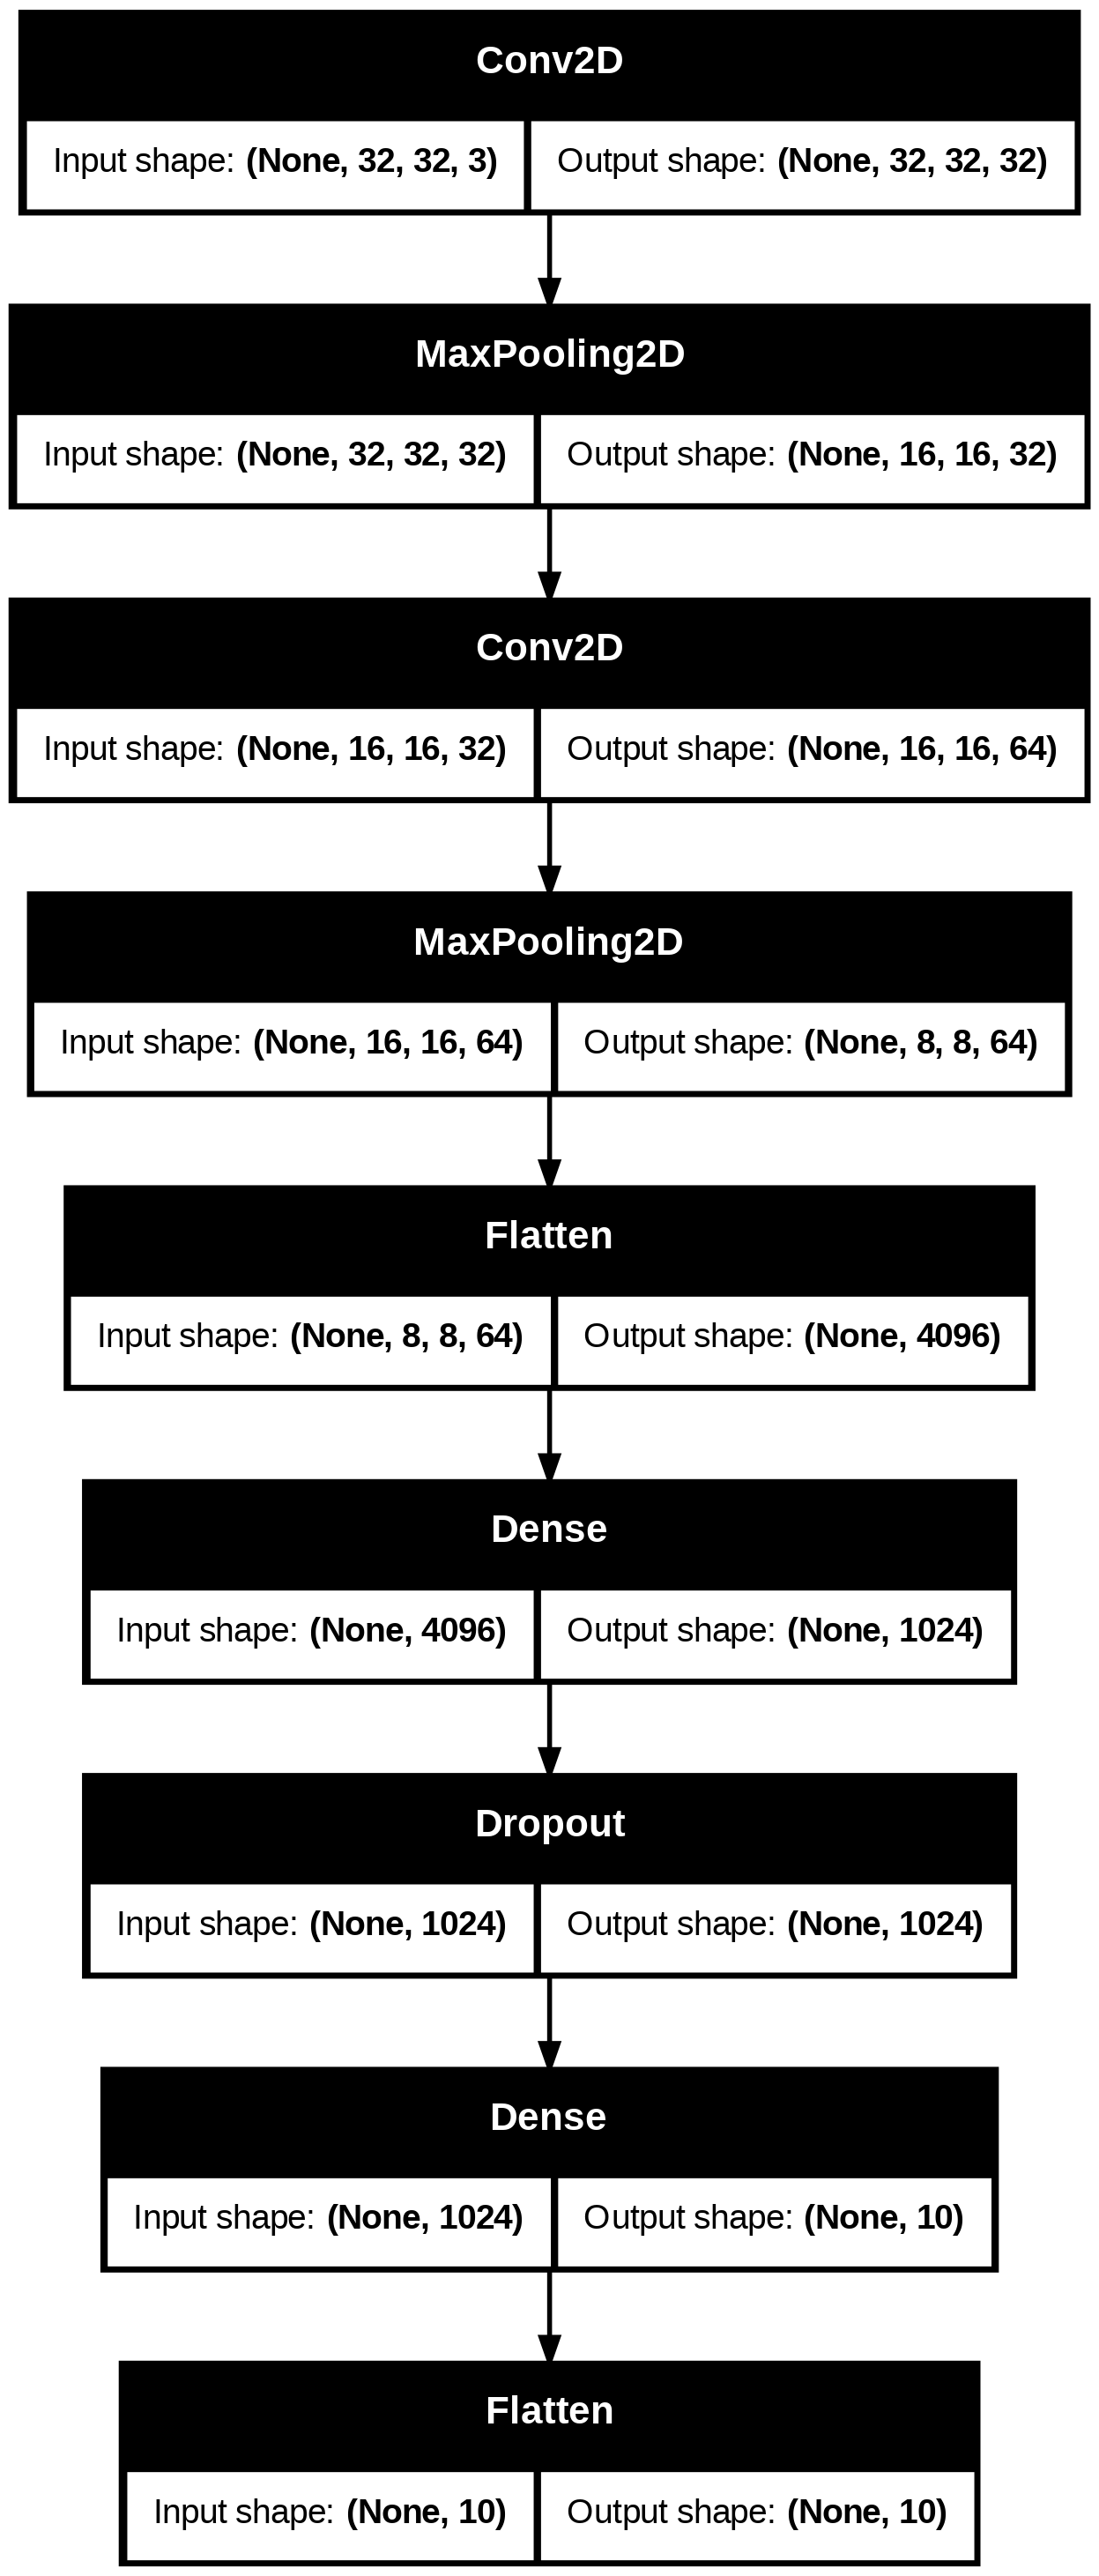

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)